<a href="https://colab.research.google.com/github/dcovarru/investmentsPython/blob/master/investments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generation of Investment Data with Python
## Author: Daniel Covarrubias

In [0]:
########################
#
# 1) Identify Symbols form API dumbstock
# 2) Pull daily Price Data for last 365 days via Yahoo
# 3) Identify Metric(s)
# 4) Identify correlations/significance
# 5) Build Historical Model on Training Set
# 6) Test Model on recent data
# 7) Use TF or sklearn
# 8) Build App on AWS or GCP to monitor realtime data
#
########################

In [0]:
########################
# Load packages 
########################

import pandas as pd
import datetime
import numpy as np
import pandas_datareader
import pandas_datareader.data as web
from pandas_datareader.data import get_quote_yahoo
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import os
import re
import plotly.figure_factory as ff
import plotly as py
import plotly.offline as offline
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
import io


In [0]:
########################
# Get Ticker Data 
########################

investData = pd.read_csv('https://dumbstockapi.com/stock?format=csv&countries=US')

In [0]:
pd.DataFrame(investData).shape
investData.shape
## investDataSubset = investData.ticker.loc[33:100]
# list(investDataSubset)
## investDataSubsetDF = pd.DataFrame(investDataSubset)
# str(investDataSubset.loc[0])
## investDataSubsetDF.columns.str.strip()
# investDataSubsetDF
investData = investData[investData.exchange == 'NASDAQ']

In [0]:
investData['exchange'].value_counts()

NASDAQ    3538
Name: exchange, dtype: int64

In [0]:
investData[investData.exchange == 'NASDAQ']

ticker                           name  is_etf exchange
2      AABA                    Altaba Inc.     NaN   NASDAQ
4       AAL  American Airlines Group, Inc.     NaN   NASDAQ
6      AAME  Atlantic American Corporation     NaN   NASDAQ
8      AAOI  Applied Optoelectronics, Inc.     NaN   NASDAQ
9      AAON                     AAON, Inc.     NaN   NASDAQ
...     ...                            ...     ...      ...
6963  ZTEST              BATS BZX Exchange     NaN   NASDAQ
6967   ZUMZ                    Zumiez Inc.     NaN   NASDAQ
6969    ZVO                     Zovio Inc.     NaN   NASDAQ
6971   ZYNE  Zynerba Pharmaceuticals, Inc.     NaN   NASDAQ
6972   ZYXI                    Zynex, Inc.     NaN   NASDAQ

[3538 rows x 4 columns]

In [0]:
######################################
# Python program to check if a string contains
# any special characters or not
# import required package
######################################

import re 
  
# Function checks if the input string(test)
# contains any special character or not
def check_splcharacter(test): 
  
    # Make an RE character set and pass  
    # this as an argument in compile function
 
    string_check= re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
      
    # Pass the string in search function  
    # of RE object (string_check).
    # print(test.ticker) 
    # NOTE: the below code relies on extracting text from the ticker attribute
    if(string_check.search(test.ticker) == None): 
        #print(str(test))
        return("noSC")
          
    else:
        #print(str(test)) 
        return("SC") 


In [0]:
investData['SCFlag'] = investData.apply(check_splcharacter, axis = 1)
# investDataSubsetDF.apply(check_splcharacter, axis = 1)
## check_splcharacter(investDataSubset[33])
## investData[investData.SCFlag == 'noSC'].shape
investData = investData[investData.SCFlag == 'noSC']

In [0]:
investData

ticker                           name  is_etf exchange SCFlag
2      AABA                    Altaba Inc.     NaN   NASDAQ   noSC
4       AAL  American Airlines Group, Inc.     NaN   NASDAQ   noSC
6      AAME  Atlantic American Corporation     NaN   NASDAQ   noSC
8      AAOI  Applied Optoelectronics, Inc.     NaN   NASDAQ   noSC
9      AAON                     AAON, Inc.     NaN   NASDAQ   noSC
...     ...                            ...     ...      ...    ...
6963  ZTEST              BATS BZX Exchange     NaN   NASDAQ   noSC
6967   ZUMZ                    Zumiez Inc.     NaN   NASDAQ   noSC
6969    ZVO                     Zovio Inc.     NaN   NASDAQ   noSC
6971   ZYNE  Zynerba Pharmaceuticals, Inc.     NaN   NASDAQ   noSC
6972   ZYXI                    Zynex, Inc.     NaN   NASDAQ   noSC

[3538 rows x 5 columns]

In [0]:
######################################
# need to address instances where ticker does not exist 
######################################

# get_data_yahoo() now treats 'null' strings as missing values (GH342)

## start = datetime.datetime(2018, 5, 1)
## end = datetime.datetime(2018, 5, 30)

def get_data(ticker):
    try:
        df = pd.DataFrame()
        # df = pandas_datareader.data.DataReader('%s' % (ticker), 'morningstar', start, end, retry_count=0)
        # df = web.get_quote_av(ticker, api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
        df = get_quote_yahoo(ticker)
        # print(df)
    except:
        pass
        
    return df

# get_data('TSLA') #valid Symbol
# get_data('yyfy') #not a valid Symbol
## get_data('A11s1APL') #valid Symbol
# get_data('QQQQ') #not a valid Symbol

In [0]:
get_data('AaaGRX')
#valid Symbol

Empty DataFrame
Columns: []
Index: []

In [0]:
## get_quote_yahoo('ZOM')
# investData.ticker[0:10]
investData.reset_index(inplace=True)
investData.ticker[0:10]

0    AABA
1     AAL
2    AAME
3    AAOI
4    AAON
5    AAPL
6    AAWW
7    AAXJ
8    AAXN
9    ABCB
Name: ticker, dtype: object

In [0]:
#########################
# Get Current Prices
# Note that if a Ticker does not have a price, the FOR LOOP will break due to lack of missing Date/PRICE element
#########################

outDF = []

for x in investData.ticker:  
    # print(get_quote_yahoo(x).price)
    # print(ticker)
    outDF.append(get_data(x))
    # print(x)
    # print(tmp)
    # dfTickerPrice = get_quote_yahoo(x).price
    # calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

In [0]:
# outDF.remove(outDF[2])
## pd.concat(outDF[1:10])
#for ele in outDF: 
#    if len(ele) == 0: 
#        outDF.remove(ele)
#print(outDF)
outDF

In [0]:
#len(outDF)
#filter(None, outDF)
outDF2 = pd.concat(outDF)
# outDF.remove(outDF[19])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [0]:
# df['add'] = df.apply(np.sum, axis = 1)
outDF2.shape

(3440, 76)

In [0]:
outDF2.index.name = 'ticker'
outDF2.reset_index(inplace=True)
outDF2

ticker     ask  ...  underlyingSymbol  ytdReturn
0      AABA   0.000  ...               NaN        NaN
1       AAL  29.200  ...               NaN        NaN
2      AAME   4.140  ...               NaN        NaN
3      AAOI  12.340  ...               NaN        NaN
4      AAON  57.120  ...               NaN        NaN
...     ...     ...  ...               ...        ...
3435   ZSAN   0.807  ...               NaN        NaN
3436   ZUMZ  32.620  ...               NaN        NaN
3437    ZVO   1.800  ...               NaN        NaN
3438   ZYNE   4.590  ...               NaN        NaN
3439   ZYXI  10.660  ...               NaN        NaN

[3440 rows x 77 columns]

In [0]:
# outDF2[outDF2.ticker == 'TSLA']

# plt.hist(float(outDF2[outDF2.price < 5]))
fig = px.box(outDF2[outDF2.price < 5], y="price", points = "all")
fig.show()

In [0]:
outDF2.to_csv('outDF2.csv')
!cp outDF2.csv "drive/My Drive/"
  # drive.flush_and_unmount()

In [0]:
drive.flush_and_unmount()

In [70]:
##############################################
# read in historical data previously created #
##############################################
drive.mount('/content/drive')
outDF2 = pd.read_csv("drive/My Drive/outDF2.csv", index_col=0)
# df=pd.read_csv('gdrive/My Drive/data.csv')
# Preview the first 5 lines of the loaded data 
# drive.flush_and_unmount()
drive.flush_and_unmount()

Mounted at /content/drive


In [72]:
# Below code is framework to pull historical data
outDF2.iloc[:,0:3]
# outDF2.loc['AAL']
outDF2

ask  askSize  ...  underlyingSymbol  ytdReturn
AABA   0.000     40.0  ...               NaN        NaN
AAL   29.200     14.0  ...               NaN        NaN
AAME   4.140      8.0  ...               NaN        NaN
AAOI  12.340      9.0  ...               NaN        NaN
AAON  57.120      9.0  ...               NaN        NaN
...      ...      ...  ...               ...        ...
ZSAN   0.807     10.0  ...               NaN        NaN
ZUMZ  32.620      9.0  ...               NaN        NaN
ZVO    1.800     14.0  ...               NaN        NaN
ZYNE   4.590      9.0  ...               NaN        NaN
ZYXI  10.660      8.0  ...               NaN        NaN

[3440 rows x 76 columns]

In [73]:
outDF2.index.name = 'ticker'
outDF2.reset_index(inplace=True)
outDF2

ticker     ask  ...  underlyingSymbol  ytdReturn
0      AABA   0.000  ...               NaN        NaN
1       AAL  29.200  ...               NaN        NaN
2      AAME   4.140  ...               NaN        NaN
3      AAOI  12.340  ...               NaN        NaN
4      AAON  57.120  ...               NaN        NaN
...     ...     ...  ...               ...        ...
3435   ZSAN   0.807  ...               NaN        NaN
3436   ZUMZ  32.620  ...               NaN        NaN
3437    ZVO   1.800  ...               NaN        NaN
3438   ZYNE   4.590  ...               NaN        NaN
3439   ZYXI  10.660  ...               NaN        NaN

[3440 rows x 77 columns]

In [84]:
outDF2.set_index("ticker", inplace=True)  

KeyError: ignored

In [75]:
## outDF2.loc[['AABA', 'ZYNE']]
pd.DataFrame(outDF2.columns)

0
0                                 ask
1                             askSize
2             averageDailyVolume10Day
3            averageDailyVolume3Month
4                                 bid
..                                ...
71               twoHundredDayAverage
72         twoHundredDayAverageChange
73  twoHundredDayAverageChangePercent
74                   underlyingSymbol
75                          ytdReturn

[76 rows x 1 columns]

In [0]:
### Write out column names ###
outDF2_Columns = pd.DataFrame(outDF2.columns)

drive.mount('/content/drive')
outDF2_Columns.to_csv('outDF2_Columns.csv')
!cp outDF2_Columns.csv "drive/My Drive/"
drive.flush_and_unmount()

In [85]:
# outDF2.dtypes
outDF2.loc['AABA']

ask                                         0
askSize                                    40
averageDailyVolume10Day                     0
averageDailyVolume3Month                    0
bid                                         0
                                       ...   
twoHundredDayAverage                  56.8643
twoHundredDayAverageChange           -37.2343
twoHundredDayAverageChangePercent   -0.654792
underlyingSymbol                          NaN
ytdReturn                                 NaN
Name: AABA, Length: 76, dtype: object

In [0]:
#############################################
## Add some TensorFlow or Pytorch Analysis ##
#############################################


In [0]:
## 02/05/2020

#ALPHAVANTAGE_API_KEY = 'ANBKAAOU9YDNYBRV'
#keyValue = os.getenv(ALPHAVANTAGE_API_KEY)
## os.environ['ALPHAVANTAGE_API_KEY'] = 'ANBKAAOU9YDNYBRV'
### get_quote_yahoo('AGRX').price
### get_quote_yahoo('WORK').price
#pd.concat('WORK', web.DataReader('WORK', 'yahoo', '2019-10-01'))
outDF3 = web.DataReader('TSLA', 'yahoo', '2019-06-01')
outDF3 = outDF3.assign(Stock = 'TSLA')
outDF3
# len(get_quote_yahoo(investData.ticker[3]))
## web.get_quote_av(["AAPL"], api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
## web.get_quote_av(["AAPL", "TSLA"])
# os.getcwd()
## os.getenv('ALPHAVANTAGE_API_KEY')
## web.get_sector_performance_av()
# alphaVantage API Key: ANBKAAOU9YDNYBRV
## investDataSubsetDF_clean =  investDataSubsetDF[investDataSubsetDF['SCFlag'] == 'noSC']
## web.DataReader('gs', 'iex-tops')
## web.get_quote_av(["AAPL", "TSLA"])

High         Low        Open  ...    Volume   Adj Close  Stock
Date                                            ...                             
2019-06-03  186.679993  176.990005  185.509995  ...  13064400  178.970001   TSLA
2019-06-04  193.979996  179.610001  181.100006  ...  13807500  193.600006   TSLA
2019-06-05  201.279999  191.850006  198.679993  ...  13510800  196.589996   TSLA
2019-06-06  211.000000  201.800003  204.440002  ...  20242200  205.949997   TSLA
2019-06-07  210.839996  203.500000  205.000000  ...  16003500  204.500000   TSLA
...                ...         ...         ...  ...       ...         ...    ...
2020-02-10  819.989990  752.400024  800.000000  ...  24689200  771.280029   TSLA
2020-02-11  783.510010  758.000000  768.789978  ...  11697500  774.380005   TSLA
2020-02-12  789.750000  763.369995  777.869995  ...  12022500  767.289978   TSLA
2020-02-13  818.000000  735.000000  741.840027  ...  26289300  804.000000   TSLA
2020-02-14  812.969971  785.500000  787.219971  ...  15656900  800.030029   TSLA

[179 rows x 7 columns]

In [0]:
outDF3.index.name = 'newDate'
outDF3.reset_index(inplace=True)
outDF3

newDate        High         Low  ...    Volume   Adj Close  Stock
0   2019-06-03  186.679993  176.990005  ...  13064400  178.970001   TSLA
1   2019-06-04  193.979996  179.610001  ...  13807500  193.600006   TSLA
2   2019-06-05  201.279999  191.850006  ...  13510800  196.589996   TSLA
3   2019-06-06  211.000000  201.800003  ...  20242200  205.949997   TSLA
4   2019-06-07  210.839996  203.500000  ...  16003500  204.500000   TSLA
..         ...         ...         ...  ...       ...         ...    ...
174 2020-02-10  819.989990  752.400024  ...  24689200  771.280029   TSLA
175 2020-02-11  783.510010  758.000000  ...  11697500  774.380005   TSLA
176 2020-02-12  789.750000  763.369995  ...  12022500  767.289978   TSLA
177 2020-02-13  818.000000  735.000000  ...  26289300  804.000000   TSLA
178 2020-02-14  812.969971  785.500000  ...  15656900  800.030029   TSLA

[179 rows x 8 columns]

In [0]:
fig = px.line(outDF3, x='newDate', y='High')
fig.show()

In [0]:
investDataSubsetDF_clean['ticker'].iloc[13]

'ACCP'

In [0]:
###################################
# Need code to extract tickers with recent data
# and extract tickers with SPECIAL CHARACTERS
# Data as of Today() - 1
###################################

dataMostRecent = []
# dataMostRecent = web.get_quote_av(list(investDataSubsetDF_clean['ticker'][14:20]), api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
dataMostRecent

[]

In [0]:
df['add'] = df.apply(np.sum, axis = 1)

NameError: ignored

In [0]:
outDF

language region quoteType  ...     market esgPopulated  price
A    en-US     US    EQUITY  ...  us_market        False  90.12

[1 rows x 71 columns]

In [0]:
#########################
# Extract Single Ticker
#########################

investData.loc[investData.ticker == 'IBIO']
myTicker = investData.loc[investData.ticker == 'IBIO'].ticker
myTicker

3164    IBIO
Name: ticker, dtype: object

In [0]:
#########################
# Create Array with Tickers
# Run from here
#########################

myTickers = ['AGRX', 'SPCE', 'WORK', 'CETX', 'TSLA']
myTickers

myTicker = ['AGRX']

In [0]:
#########################
# Extract Single Series
#########################

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 1, 11)

#########################
# here arbirtraty ticker input
# note that excluding "end" will extract current data
#########################

df = web.DataReader(myTicker, 'yahoo', start)
# df.describe()

In [0]:
#########################
# Extract Multiple Series
#########################

outDF = []

for i in myTickers:  
    df = web.DataReader(myTickers, 'yahoo', start)
    calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9bb94cb00>,
      dtype=object)

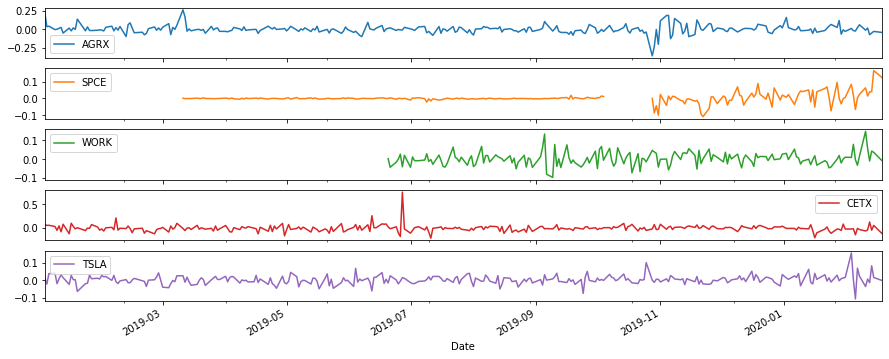

In [8]:
# calPerChange = []
calPerChange.head()
calPerChange.plot(subplots=True, figsize=(15,6))

In [9]:
corr = calPerChange.corr()
corr

Symbols      AGRX      SPCE      WORK      CETX      TSLA
Symbols                                                  
AGRX     1.000000  0.070598  0.023858  0.059532  0.036939
SPCE     0.070598  1.000000  0.063959  0.020090  0.231177
WORK     0.023858  0.063959  1.000000 -0.053147  0.012853
CETX     0.059532  0.020090 -0.053147  1.000000  0.086999
TSLA     0.036939  0.231177  0.012853  0.086999  1.000000

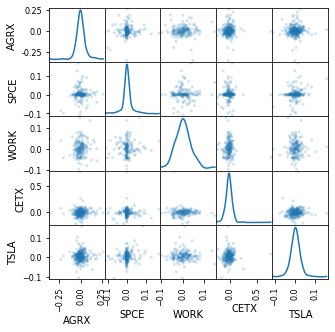

In [10]:
scatter_matrix(calPerChange, diagonal='kde', alpha=0.2, figsize=(5, 5));

Text(0, 0.5, 'Returns SRRA')

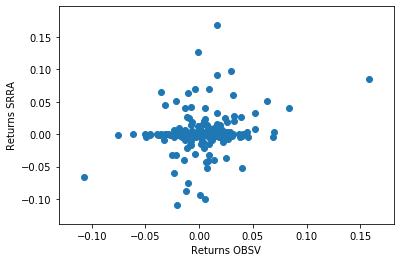

In [11]:
plt.scatter(calPerChange.TSLA, calPerChange.SPCE)
plt.xlabel('Returns OBSV')
plt.ylabel('Returns SRRA')

Text(0, 0.5, 'Returns IBIO')

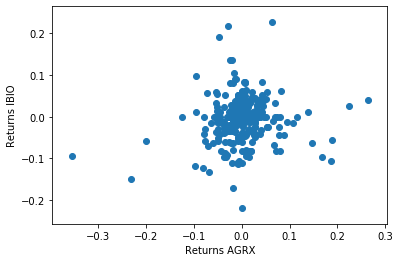

In [0]:
#########################
# One outlier, remove
#########################

calPerChange2 = calPerChange[calPerChange.IBIO < 1]

plt.scatter(calPerChange2.AGRX, calPerChange2.IBIO)
plt.xlabel('Returns AGRX')
plt.ylabel('Returns IBIO')

In [0]:
#########################
# some calculated values 
#########################

# calPerChange = (outDF.Close - outDF.Open)/outDF.Open
# calPerChange
# calPerChange = calPerChange.rename(columns={"IBIO": "PerChange"})
# list(outDF.columns) 

In [0]:
# calPerChange.pivot_table(index='Date',columns='Stock',values='PerChange',aggfunc='sum').plot()

In [0]:
#########################
# some calculated values 
#########################

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head()

Symbols     IBIO
Date            
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN

In [0]:
#########################
# join DF's 
#########################

dfMerge = df.merge(calPerChange, left_on = 'Date', right_on = 'Date')
# list(dfMerge.columns)
dfMerge.tail()

(Adj Close, IBIO)  (Close, IBIO)  (High, IBIO)  (Low, IBIO)  \
Date                                                                      
2019-12-23              0.250          0.250        0.2700       0.2300   
2019-12-24              0.240          0.240        0.2500       0.2300   
2019-12-26              0.230          0.230        0.2400       0.2200   
2019-12-27              0.230          0.230        0.2400       0.2200   
2019-12-30              0.253          0.253        0.2625       0.2301   

            (Open, IBIO)  (Volume, IBIO)  PerChange  
Date                                                 
2019-12-23          0.25       6314800.0   0.000000  
2019-12-24          0.25       1628200.0  -0.040000  
2019-12-26          0.23       2195500.0   0.000000  
2019-12-27          0.23       2795500.0   0.000000  
2019-12-30          0.24       5165363.0   0.054167

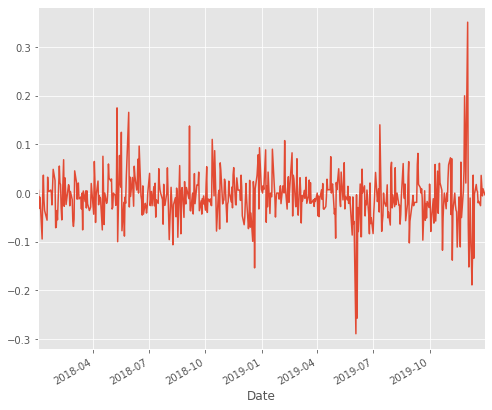

In [0]:
#########################
# create Chart
# with Chart formatting
#########################

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# close_px.plot(label='AGRX')
# mavg.plot(label='Adj Close')
# plt.legend()

dfMerge.PerChange.plot()

In [0]:
dfMerge.tail()

(Adj Close, SRRA)  (Close, SRRA)  (High, SRRA)  (Low, SRRA)  \
Date                                                                      
2019-12-23             0.3380         0.3380         0.347       0.3210   
2019-12-24             0.3420         0.3420         0.344       0.3210   
2019-12-26             0.3400         0.3400         0.344       0.3300   
2019-12-27             0.3400         0.3400         0.345       0.3310   
2019-12-30             0.3388         0.3388         0.340       0.3253   

            (Open, SRRA)  (Volume, SRRA)  PerChange  
Date                                                 
2019-12-23         0.347         1525800  -0.025937  
2019-12-24         0.330         1177000   0.036364  
2019-12-26         0.342         1040700  -0.005848  
2019-12-27         0.337         1350000   0.008902  
2019-12-30         0.340         1126159  -0.003529